# Project 6 : Prediction of Closing Prices of Various Stocks



*   Name : Aditya Sneh
*   Roll No : 19017



---

In [3]:
#Importing Libraries

import pandas as pd              
import numpy as np               
import seaborn as sns           
import matplotlib.pyplot as plt 

In [4]:
#Mounting Google Drive Script

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive
Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


---

# Loading Datasets

In [5]:
#Loading Training Dataset

df_train = pd.read_csv("/content/gdrive/MyDrive/stocknet_trn_data.csv")
print(df_train)

             Open        High         Low      Volume
0       75.430000   75.910004   75.139999   3436700.0
1      124.930000  124.940002  124.169998   2366700.0
2       84.339996   84.370003   82.370003  11338700.0
3       56.770000   57.150002   56.529999    413300.0
4       47.419998   48.090000   46.759998   9531100.0
...           ...         ...         ...         ...
97727  103.650002  103.809998  103.089996   3678200.0
97728   64.419998   64.730003   64.190002  20273100.0
97729  581.070007  581.400024  571.070007   3416500.0
97730  120.650002  120.650002  114.959999  13261700.0
97731   64.870003   64.959999   64.309998    667000.0

[97732 rows x 4 columns]


In [6]:
#Loading Trainging Labels & adding column name

train_label = pd.read_csv("/content/gdrive/MyDrive/stocknet_trn_data_targets.csv", names = ["labels", "Closing Price"])
print(train_label)

       labels  Closing Price
0          d1      75.650002
1          d2     124.449997
2          d3      82.660004
3          d4      57.009998
4          d5      47.860001
...       ...            ...
97727  d97728     103.230003
97728  d97729      64.620003
97729  d97730     575.140015
97730  d97731     115.400002
97731  d97732      64.720001

[97732 rows x 2 columns]


In [7]:
#Loading Test Data

df_test = pd.read_csv (r'/content/gdrive/MyDrive/stocknet_tst_data.csv')
print (df_test)

             Open        High         Low    Volume
0       26.299999   26.520000   25.959999  32642100
1       95.550003   95.739998   94.019997   1826300
2       54.770000   55.360001   54.590000   5656800
3      125.589996  125.820000  123.660004   4151600
4       20.709999   20.809999   20.670000  10489800
...           ...         ...         ...       ...
10855   51.660000   52.919998   49.919998     87000
10856   39.549999   40.619999   39.189999  35177200
10857   22.780001   22.900000   22.389999   9404100
10858   33.750000   34.060001   33.580002  26179000
10859   91.010002   91.680000   89.970001   4675300

[10860 rows x 4 columns]


---

# EDA : Data Analysis

In [8]:
#Printing First 5 Rows

print(df_train.head())

         Open        High         Low      Volume
0   75.430000   75.910004   75.139999   3436700.0
1  124.930000  124.940002  124.169998   2366700.0
2   84.339996   84.370003   82.370003  11338700.0
3   56.770000   57.150002   56.529999    413300.0
4   47.419998   48.090000   46.759998   9531100.0


In [9]:
#Printing last 5 rows

print(df_train.tail())

             Open        High         Low      Volume
97727  103.650002  103.809998  103.089996   3678200.0
97728   64.419998   64.730003   64.190002  20273100.0
97729  581.070007  581.400024  571.070007   3416500.0
97730  120.650002  120.650002  114.959999  13261700.0
97731   64.870003   64.959999   64.309998    667000.0


In [10]:
#Analyzing statistics

print(df_train.describe())

                Open           High            Low        Volume
count   97729.000000   97729.000000   97729.000000  9.772900e+04
mean     2427.661341    2439.557429    2413.965223  9.064781e+06
std     21797.841949   21900.340643   21678.006665  1.800910e+07
min         2.130000       2.280000       1.960000  0.000000e+00
25%        40.450001      40.730000      40.180000  1.198000e+06
50%        65.959999      66.489998      65.459999  3.544600e+06
75%        97.669998      98.470001      96.930000  8.996400e+06
max    272800.000000  272885.000000  271040.000000  6.166205e+08


In [11]:
#Getting info about Rows & Columns

print(df_train.shape)

(97732, 4)


In [12]:
#Data Counts

df_train.count()

Open      97729
High      97729
Low       97729
Volume    97729
dtype: int64

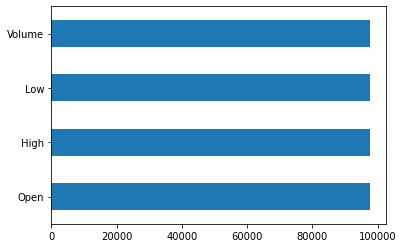

In [13]:
df_train.count().plot(kind = "barh")

In [14]:
#Getting the data types information

print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97732 entries, 0 to 97731
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    97729 non-null  float64
 1   High    97729 non-null  float64
 2   Low     97729 non-null  float64
 3   Volume  97729 non-null  float64
dtypes: float64(4)
memory usage: 3.0 MB
None


---

# Data Visualization

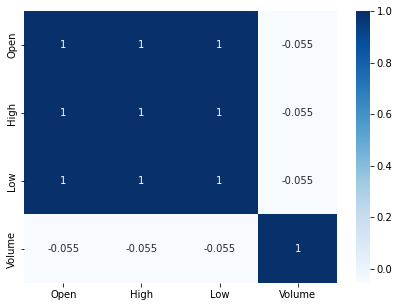

In [15]:
#This plot shows the coorelation between two variables or features. There are lots of 1's which shows it has high positive correlations and are interrelated. This might be possible because of the comparatively very small difference between those values.

plt.figure(figsize=(7,5))
sns.heatmap(df_train.corr(),cmap='Blues',annot=True)

In [16]:
df_train_plot = df_train.copy()

In [17]:
#Adding some more features to analyze dataset more precisely

df_train_plot['Open-High'] = df_train_plot['Open']-df_train_plot['High']
df_train_plot['Open-Low'] = df_train_plot['Open'] - df_train_plot['Low']
df_train_plot['High-Low'] = df_train_plot['High'] - df_train_plot['Low']
df_train_plot.head()

,Open,High,Low,Volume,Open-High,Open-Low,High-Low
0,75.430000,75.910004,75.139999,3436700.0,-0.480004,0.290001,0.770005
1,124.930000,124.940002,124.169998,2366700.0,-0.010002,0.760002,0.770004
2,84.339996,84.370003,82.370003,11338700.0,-0.030007,1.969993,2.000000
3,56.770000,57.150002,56.529999,413300.0,-0.380002,0.240001,0.620003
4,47.419998,48.090000,46.759998,9531100.0,-0.670002,0.660000,1.330002


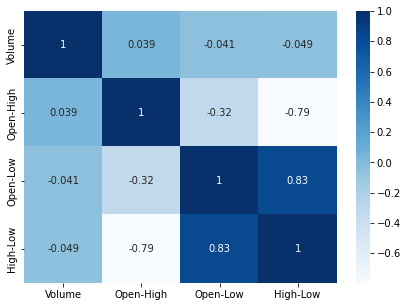

In [18]:
data2 = df_train_plot.copy()
data2 = data2.drop(['Open','High','Low'],axis=1)
plt.figure(figsize=(7,5))
sns.heatmap(data2.corr(),cmap='Blues',annot=True)

##### Dataset Analysis Driven From Above Diagram

*   Variables having a large correlation value with volume represent that those numbers might have intrigued a large number of buyers and sellers.
*   Correlation between those features and the volume feature will tell us how a change in that feature impacts the number of stocks traded that day.
*   High difference in opening and highest value of the stock might attract more buyers. Whereas a fewer difference may attract more sellers.




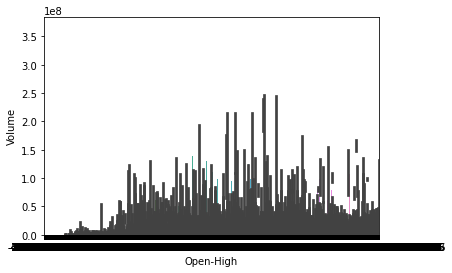

In [19]:
#Volume is high for larger value of Open-High as compared to smaller values of Open-High

sns.barplot(data=df_train_plot, x = "Open-High", y="Volume")

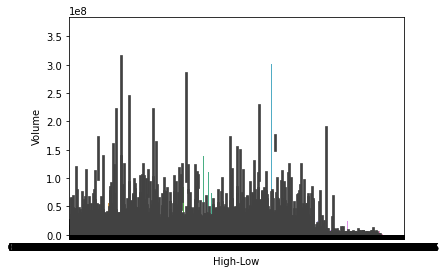

In [ ]:
#Volume is high for smaller values of High-Low and lower for high values of High-Low

sns.barplot(data=df_train_plot, x = "High-Low", y="Volume")

---

# Data Cleaning

In [20]:
#Check missing values

print(df_train.isna().sum())

Open      3
High      3
Low       3
Volume    3
dtype: int64


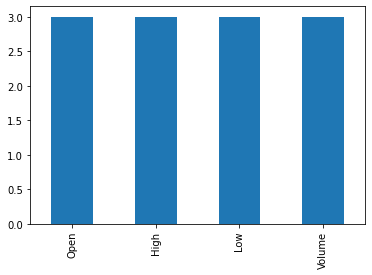

In [21]:
import matplotlib.pyplot as plt
df_train.isna().sum().plot(kind = "bar")
plt.show()

In [22]:
#Filling mean values as missing data because data set is data distribution is symmetric

df_train["High"] = df_train["High"].fillna(df_train["High"].mean())
df_train["Open"] = df_train["Open"].fillna(df_train["Open"].mean())
df_train["Low"]= df_train["Low"].fillna(df_train["Low"].mean())
df_train["Volume"] = df_train["Volume"].fillna(df_train["Volume"].mean())

In [23]:
print(train_label.isna().sum(axis = 1))
print(" ")
print(train_label.isna().any())

0        0
1        0
2        0
3        0
4        0
        ..
97727    0
97728    0
97729    0
97730    0
97731    0
Length: 97732, dtype: int64
 
labels           False
Closing Price     True
dtype: bool


In [24]:
#Filling mean values as missing data because data set is data distribution is symmetric

df_train_labels = train_label["Closing Price"].fillna(train_label["Closing Price"].mean())
print(df_train_labels)

0         75.650002
1        124.449997
2         82.660004
3         57.009998
4         47.860001
            ...    
97727    103.230003
97728     64.620003
97729    575.140015
97730    115.400002
97731     64.720001
Name: Closing Price, Length: 97732, dtype: float64


In [25]:
#Combining training dataset and labeling dataset

b = pd.concat([df_train,df_train_labels], axis = 1)
print(b)

             Open        High         Low      Volume  Closing Price
0       75.430000   75.910004   75.139999   3436700.0      75.650002
1      124.930000  124.940002  124.169998   2366700.0     124.449997
2       84.339996   84.370003   82.370003  11338700.0      82.660004
3       56.770000   57.150002   56.529999    413300.0      57.009998
4       47.419998   48.090000   46.759998   9531100.0      47.860001
...           ...         ...         ...         ...            ...
97727  103.650002  103.809998  103.089996   3678200.0     103.230003
97728   64.419998   64.730003   64.190002  20273100.0      64.620003
97729  581.070007  581.400024  571.070007   3416500.0     575.140015
97730  120.650002  120.650002  114.959999  13261700.0     115.400002
97731   64.870003   64.959999   64.309998    667000.0      64.720001

[97732 rows x 5 columns]


In [26]:
b.isna().any()

Open             False
High             False
Low              False
Volume           False
Closing Price    False
dtype: bool

---

# Splitting Datsets

In [27]:
#Importing Libraries
from sklearn.model_selection import train_test_split

#Seperate Datasets into train data and train labels
X = df_train.loc[ : ,["Open", "High", "Low", "Volume"]]
y = b.iloc[:,-1]

#Splitting dataset with train/test split
X_train,X_test,y_train,y_test = train_test_split( X, y, test_size=0.20, random_state=42 )

In [28]:
# Summarize
print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)

Train (78185, 4) (78185,)
Test (19547, 4) (19547,)


---

# Case 1: Model Built Using All Features

Features Used : Open, High, Low, Volume

## Linear Regression

In [29]:
#Importing Libraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score 

In [30]:
regression_model = LinearRegression()
regression_model.fit(X_train,y_train)

LinearRegression()

In [31]:
y_predicted = regression_model.predict(X_test)

In [32]:
#Model Evaluation

from sklearn import metrics

print("MAPE:", metrics.mean_absolute_percentage_error(y_test, y_predicted))
print('MAE: ', metrics.mean_absolute_error(y_test, y_predicted))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_predicted)))
print("R2 Score: ",metrics.r2_score(y_test, y_predicted))

MAPE: 0.0038233143278131976
MAE:  6.124797802867979
RMSE: 69.48875189475795
R2 Score:  0.999989455896641


In [33]:
#Predict result on testing data
y_pred = regression_model.predict(df_test)

#Printing Predicted Value
pd.DataFrame({'Predicted': y_pred})

,Predicted
0,26.191477
1,94.505917
2,55.049477
3,124.288592
4,20.699046
...,...
10855,51.314693
10856,40.117504
10857,22.524338
10858,33.833360


In [43]:
lg_pred = pd.DataFrame(y_pred, index = None)
lg_pred.to_csv("test_pred_final.txt", header = None, index = None)

---

# Random Forest

In [34]:
from sklearn.ensemble import RandomForestRegressor

rfr_model = RandomForestRegressor(n_estimators = 20,random_state = 42, max_depth = 18)
rfr_model.fit(X_train,y_train)

RandomForestRegressor(max_depth=18, n_estimators=20, random_state=42)

In [35]:
y_pred_rf = rfr_model.predict(X_test)

In [36]:
#Model Evaluation

from sklearn import metrics

print("MAPE:", metrics.mean_absolute_percentage_error(y_test, y_pred_rf))
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_rf))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_rf)))
print("R2 Score: ",metrics.r2_score(y_test, y_pred_rf))

MAPE: 0.003931224773370583
MAE: 8.765316606122713
RMSE: 105.53632508304845
R2 Score:  0.9999756788242148


In [37]:
#Predict result on testing data
y_pred_result = rfr_model.predict(df_test)

#Printing Predicted Value
pd.DataFrame({'Predicted': y_pred_result})

,Predicted
0,26.300289
1,94.517388
2,54.982724
3,124.441519
4,20.740918
...,...
10855,51.549432
10856,40.215269
10857,22.717282
10858,33.852483


---

# KNN

In [38]:
from sklearn.neighbors import KNeighborsRegressor

In [39]:
knn_model = KNeighborsRegressor(n_neighbors=15)
knn_model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=15)

In [40]:
y_pred_knn = knn_model.predict(X_test)

In [41]:
#Model Evaluation

from sklearn import metrics

print("MAPE:", metrics.mean_absolute_percentage_error(y_test, y_pred_knn))
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_knn))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_knn)))
print("R2 Score: ",metrics.r2_score(y_test, y_pred_knn))

MAPE: 0.6861968893586492
MAE: 58.769131520706736
RMSE: 183.69919176612325
R2 Score:  0.9999263122793414


In [42]:
#Predict result on testing data
y_pred_knn_result = knn_model.predict(df_test)

#Printing Predicted Value
pd.DataFrame({'Predicted': y_pred_knn_result})

,Predicted
0,45.142667
1,81.954552
2,77.494001
3,82.975167
4,53.879797
...,...
10855,48.546667
10856,53.349000
10857,60.358833
10858,43.666001


---

---

# Feature Selection : Is it really needed for 4 columns?

Feature 0: 4.335536
Feature 1: 4.993344
Feature 2: 4.929872
Feature 3: 0.353862


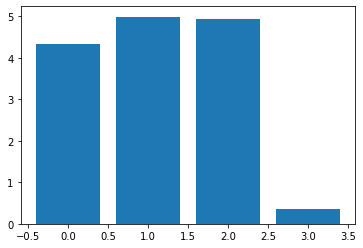

In [76]:
#Importing Libraries
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
from matplotlib import pyplot
 
# Defining a fucntion of feature selection
def select_features(X_train, y_train, X_test):
	# configure to select all features
	fs = SelectKBest(score_func=mutual_info_regression, k='all')
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs
 
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)

# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
 
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

### Feature Analysis

From above bar graph it is clear that the feature 3 which is Volume Feature in dataset is not important.High + Low feature is most important feature in dataset followed by open feature.

## Testing all algorithm with Top 3 features

In [81]:
# Evaluation of a model using 3 features chosen with mutual information

#Importing Libraries
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
 
# Feature selection
def select_features(X_train, y_train, X_test):
	# configure to select a subset of features
	fs = SelectKBest(score_func=mutual_info_regression, k=3) #here k = 3 means to select the best 3 features
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

MAE: 6.420


In [82]:
#Linear Regression with 3 features

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# fit the model
model = LinearRegression()
model.fit(X_train_fs, y_train)
# evaluate the model
yhat = model.predict(X_test_fs)
# evaluate predictions
mae = mean_absolute_error(y_test, yhat)

#Printing Result
print("MAPE:", metrics.mean_absolute_percentage_error(y_test, y_pred_rfs))
print('MAE: %.3f' % mae)
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, yhat)))


MAE: 6.420


In [83]:
#Random Forest with 3 features

# fit the model
rfrs_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
rfrs_model.fit(X_train_fs,y_train)

# evaluate the model
y_pred_rfs = rfrs_model.predict(X_test_fs)

# evaluate predictions
print("MAPE:", metrics.mean_absolute_percentage_error(y_test, y_pred_rfs))
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_rfs))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_rfs)))

MAPE: 0.004025443711354798
MAE: 8.40023666757584
RMSE: 102.33936435319775
R2 Score:  0.9999779677922924


In [ ]:
#KNN Regressor with 3 features

# fit the model
knnx_model = KNeighborsRegressor(n_neighbors=5)
knnx_model.fit(X_train_fs, y_train)
# evaluate the model
y_pred_knnx = knn_model.predict(X_test_fs)

# evaluate predictions
print("MAPE:", metrics.mean_absolute_percentage_error(y_test, y_pred_knnx))
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_knnx))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_knnx)))


---

# Is Dropping a feature really effect the MAE score or improve model accuracy ?

In [86]:
#Importing Libraries

from sklearn.datasets import make_regression
from sklearn.model_selection import RepeatedKFold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# define the evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

# define the pipeline to evaluate
model = LinearRegression()
fs = SelectKBest(score_func=mutual_info_regression)
pipeline = Pipeline(steps=[('sel',fs), ('lr', model)])

# Define the grid
grid = dict()
grid['sel__k'] = [i for i in range(X.shape[1]-20, X.shape[1]+1)]

# define the grid search
search = GridSearchCV(pipeline, grid, scoring='neg_mean_squared_error', n_jobs=-1, cv=cv)

# perform the search
results = search.fit(X, y)

# summarize best
print('Best MAE: %.3f' % results.best_score_)
print('Best Config: %s' % results.best_params_)

# summarize all
means = results.cv_results_['mean_test_score']
params = results.cv_results_['params']
for mean, param in zip(means, params):
    print(">%.3f with: %r" % (mean, param))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
510 fits failed out of a total of 630.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py", line 390, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py", line 355, in _fit
    **fit_params_steps[name],
  File "/usr/local/lib/python3.7/dist-packages/joblib/memory.py", li

Best MAE: -5164.148
Best Config: {'sel__k': 3}
>nan with: {'sel__k': -16}
>nan with: {'sel__k': -15}
>nan with: {'sel__k': -14}
>nan with: {'sel__k': -13}
>nan with: {'sel__k': -12}
>nan with: {'sel__k': -11}
>nan with: {'sel__k': -10}
>nan with: {'sel__k': -9}
>nan with: {'sel__k': -8}
>nan with: {'sel__k': -7}
>nan with: {'sel__k': -6}
>nan with: {'sel__k': -5}
>nan with: {'sel__k': -4}
>nan with: {'sel__k': -3}
>nan with: {'sel__k': -2}
>nan with: {'sel__k': -1}
>nan with: {'sel__k': 0}
>-10374.206 with: {'sel__k': 1}
>-7808.476 with: {'sel__k': 2}
>-5164.148 with: {'sel__k': 3}
>-5164.148 with: {'sel__k': 4}


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
30 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py", line 390, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py", line 355, in _fit
    **fit_params_steps[name],
  File "/usr/local/lib/python3.7/dist-packages/joblib/memory.py", line

>-15 nan (nan)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
30 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py", line 390, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py", line 355, in _fit
    **fit_params_steps[name],
  File "/usr/local/lib/python3.7/dist-packages/joblib/memory.py", line

>-14 nan (nan)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
30 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py", line 390, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py", line 355, in _fit
    **fit_params_steps[name],
  File "/usr/local/lib/python3.7/dist-packages/joblib/memory.py", line

>-13 nan (nan)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
30 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py", line 390, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py", line 355, in _fit
    **fit_params_steps[name],
  File "/usr/local/lib/python3.7/dist-packages/joblib/memory.py", line

>-12 nan (nan)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
30 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py", line 390, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py", line 355, in _fit
    **fit_params_steps[name],
  File "/usr/local/lib/python3.7/dist-packages/joblib/memory.py", line

>-11 nan (nan)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
30 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py", line 390, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py", line 355, in _fit
    **fit_params_steps[name],
  File "/usr/local/lib/python3.7/dist-packages/joblib/memory.py", line

>-10 nan (nan)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
30 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py", line 390, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py", line 355, in _fit
    **fit_params_steps[name],
  File "/usr/local/lib/python3.7/dist-packages/joblib/memory.py", line

>-9 nan (nan)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
30 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py", line 390, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py", line 355, in _fit
    **fit_params_steps[name],
  File "/usr/local/lib/python3.7/dist-packages/joblib/memory.py", line

>-8 nan (nan)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
30 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py", line 390, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py", line 355, in _fit
    **fit_params_steps[name],
  File "/usr/local/lib/python3.7/dist-packages/joblib/memory.py", line

>-7 nan (nan)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
30 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py", line 390, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py", line 355, in _fit
    **fit_params_steps[name],
  File "/usr/local/lib/python3.7/dist-packages/joblib/memory.py", line

>-6 nan (nan)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
30 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py", line 390, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py", line 355, in _fit
    **fit_params_steps[name],
  File "/usr/local/lib/python3.7/dist-packages/joblib/memory.py", line

>-5 nan (nan)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
30 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py", line 390, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py", line 355, in _fit
    **fit_params_steps[name],
  File "/usr/local/lib/python3.7/dist-packages/joblib/memory.py", line

>-4 nan (nan)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
30 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py", line 390, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py", line 355, in _fit
    **fit_params_steps[name],
  File "/usr/local/lib/python3.7/dist-packages/joblib/memory.py", line

>-3 nan (nan)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
30 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py", line 390, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py", line 355, in _fit
    **fit_params_steps[name],
  File "/usr/local/lib/python3.7/dist-packages/joblib/memory.py", line

>-2 nan (nan)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
30 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py", line 390, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py", line 355, in _fit
    **fit_params_steps[name],
  File "/usr/local/lib/python3.7/dist-packages/joblib/memory.py", line

>-1 nan (nan)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
30 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py", line 663, in fit
    X, y, accept_sparse=accept_sparse, y_numeric=True, multi_output=True
  F

>0 nan (nan)
>1 -8.684 (0.799)
>2 -7.794 (0.661)
>3 -6.176 (0.594)
>4 -6.176 (0.594)


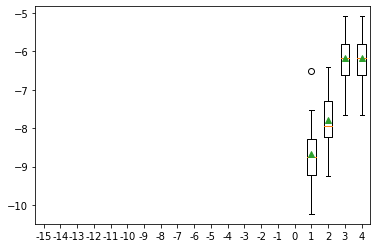

In [87]:
# compare different numbers of features selected using mutual information
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from matplotlib import pyplot

# define number of features to evaluate
num_features = [i for i in range(X.shape[1]-19, X.shape[1]+1)]
# enumerate each number of features
results = list()
for k in num_features:
  
	# create pipeline
	model = LinearRegression()
	fs = SelectKBest(score_func=mutual_info_regression, k=k)
	pipeline = Pipeline(steps=[('sel',fs), ('lr', model)])
	# evaluate the model
	cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(pipeline, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
	results.append(scores)
	# summarize the results
	print('>%d %.3f (%.3f)' % (k, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=num_features, showmeans=True)
pyplot.show()

---

# Hyperparameter Tuning

# Random Forest

In [97]:
from sklearn.model_selection import GridSearchCV
rf = RandomForestRegressor()
n_estimators=np.arange(5,100,20)
param_grid = {'n_estimators': n_estimators,'max_depth': [2, 24, 2], 'bootstrap': [True, False]}
model = GridSearchCV(estimator = rf,param_grid=param_grid, cv = 5, verbose=2, n_jobs = -1)
model.fit(X_train,y_train)
model.best_params_

Fitting 5 folds for each of 30 candidates, totalling 150 fits


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


{'bootstrap': True, 'max_depth': 24, 'n_estimators': 65}

In [98]:
print(model.best_estimator_)
print(model.best_params_)

RandomForestRegressor(max_depth=24, n_estimators=65)
{'bootstrap': True, 'max_depth': 24, 'n_estimators': 65}


---

# KNN

In [78]:
from sklearn.neighbors import KNeighborsRegressor

In [79]:
model = KNeighborsRegressor()

In [80]:
model

KNeighborsRegressor()

In [81]:
model = KNeighborsRegressor(n_neighbors=5)

In [82]:
# Select an algorithm
algorithm = KNeighborsRegressor()
from sklearn.model_selection import KFold

In [83]:
# Create 3 folds
seed = 13
kfold = KFold(n_splits=3, shuffle=True, random_state=seed)

In [94]:
# Define our candidate hyperparameters
hp_candidates = [{'n_neighbors': [2,4,5,6,7,8,9], 'weights': ['uniform','distance']}]

In [95]:
# Search for best hyperparameters
grid = GridSearchCV(estimator=algorithm, param_grid=hp_candidates, cv=kfold, scoring='neg_median_absolute_error')
grid.fit(X, y)

GridSearchCV(cv=KFold(n_splits=3, random_state=13, shuffle=True),
             estimator=KNeighborsRegressor(),
             param_grid=[{'n_neighbors': [2, 4, 5, 6, 7, 8, 9],
                          'weights': ['uniform', 'distance']}],
             scoring='neg_median_absolute_error')

In [91]:
# Get the results
#print(grid.best_score_)
print(grid.best_estimator_)
print(grid.best_params_)

KNeighborsRegressor(n_neighbors=4, weights='distance')
{'n_neighbors': 4, 'weights': 'distance'}


In [87]:
grid.cv_results_

{'mean_fit_time': array([0.05526574, 0.05465508, 0.05490677, 0.05900304, 0.05549089,
        0.06261834, 0.05700914, 0.05730891, 0.05664468, 0.0551215 ]),
 'mean_score_time': array([0.08681631, 0.09172185, 0.0997812 , 0.09924054, 0.09713443,
        0.10224843, 0.09912825, 0.10438108, 0.09996923, 0.10163522]),
 'mean_test_score': array([-22.051666  , -20.68419261, -22.50113339, -20.42491537,
        -23.01673592, -20.53225333, -23.4634365 , -20.63374553,
        -23.95252758, -20.75882021]),
 'param_n_neighbors': masked_array(data=[2, 2, 3, 3, 4, 4, 5, 5, 6, 6],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'param_weights': masked_array(data=['uniform', 'distance', 'uniform', 'distance',
                    'uniform', 'distance', 'uniform', 'distance',
                    'uniform', 'distance'],
              mask=[False, False, False, False, False, False, False, False,

---